<a href="https://colab.research.google.com/github/PickleRiv/FAA_Pj01/blob/main/FAA_PJ01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare environment and load data

## Load Libraries

In [ ]:
#importing libraries
import numpy as np 
import pandas as pd
import random as rd

#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

#for the CNN model
## Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
## tensorflow
import tensorflow as tf
from tensorflow import keras

#setting seed for reproducability
from numpy.random import seed
seed(10)
tf.random.set_seed(20)

## Load train and test datasets

In [ ]:
train_dataset = pd.read_csv("/content/input/sign_mnist_train.csv")
test_dataset  = pd.read_csv("/content/input/sign_mnist_test.csv")

### Check datasets

In [ ]:
print("train dataset info:")
train_dataset.info()

train dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
print("train data description:")
train_dataset.describe()

train data description:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
print("train data head:")
train_dataset.head()

train data head:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
print("test dataset info:")
test_dataset.info()

test dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [ ]:
print("test data description:")
test_dataset.describe()

test data description:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,...,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,11.247351,147.532627,150.445761,153.324317,155.663413,158.169688,160.790853,162.282766,163.649191,165.589515,...,138.546570,145.539598,150.744980,155.638873,158.893196,159.648494,158.162019,157.672755,156.664250,154.776771
std,7.446712,43.593144,41.867838,40.442728,39.354776,37.749637,36.090916,36.212636,35.885378,33.721876,...,64.501665,65.132370,65.760539,65.565147,65.200300,65.499368,66.493576,66.009690,67.202939,68.285148
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,122.000000,126.000000,130.000000,134.000000,137.000000,141.000000,144.000000,145.000000,147.000000,...,90.000000,95.000000,99.000000,105.000000,113.000000,113.750000,113.000000,115.000000,111.000000,106.750000
50%,11.000000,154.000000,157.000000,159.000000,161.000000,163.000000,165.000000,166.000000,168.000000,169.000000,...,137.000000,155.000000,168.000000,177.000000,181.000000,182.000000,181.000000,180.000000,180.000000,179.000000
75%,18.000000,178.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,187.000000,187.000000,...,195.000000,200.000000,204.250000,207.000000,207.000000,208.000000,207.000000,205.000000,206.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
print("test data head:")
test_dataset.head()

test data head:


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


### Checking for missing data

In [ ]:
#summing the number of na in the training set for each column
print("na in train data:")
print(sum(train_dataset.isna().sum()))

#summing the number of na in the test set for each column
print("na in test data:")
print(sum(test_dataset.isna().sum()))

#summing the number of null values in the training set for each column
print("null in train data:")
print(sum(train_dataset.isnull().sum()))

#summing the number of null values in the test set for each column
print("null in test data:")
print(sum(test_dataset.isnull().sum()))

na in train data:
0
na in test data:
0
null in train data:
0
null in test data:
0


## Transform data

### 1. Train data

In [ ]:
Y_train = train_dataset['label']
X_train = train_dataset.drop(labels = ['label'],axis=1)
X_train = X_train/255.0
X_train = X_train.values.reshape(-1,28,28,1)

In [ ]:
print(f"X train shape: {X_train.shape}")

X train shape: (27455, 28, 28, 1)


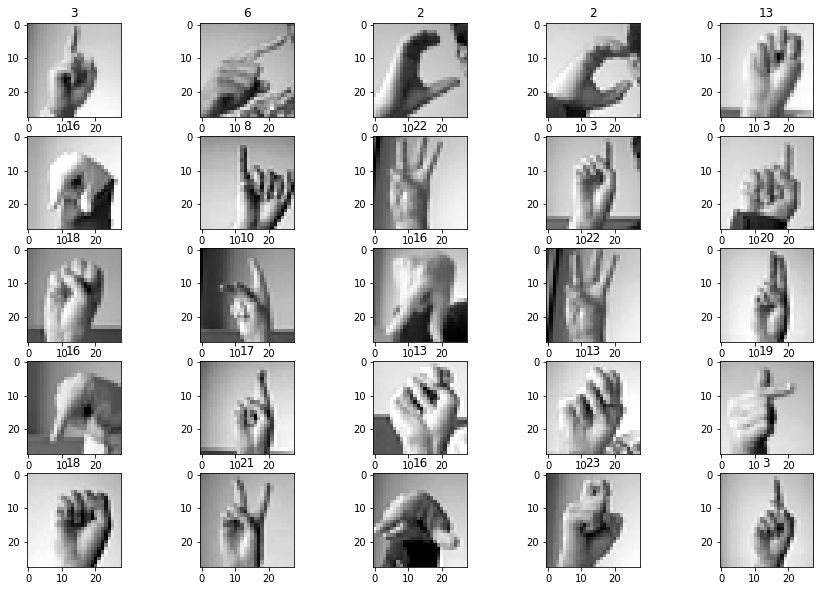

In [ ]:
#creating a 5x5 grid of the first 25 photos in the training images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(Y_train[i])
plt.show()

In [ ]:
#creating an interactive bar graph that shows the distrubition of labels within the training set
fig = px.histogram(train_dataset, 
                   x='label', 
                   color = 'label',
                   title="Distribution of Labels in the Training Set",
                   width=700, height=500)
fig.show()

2. Test data

In [ ]:
Y_test = test_dataset['label']
X_test = test_dataset.drop(['label'],axis=1)
X_test = X_test/255.0
X_test = X_test.values.reshape(-1,28,28,1)

In [ ]:
print(f"X test shape: {X_test.shape}")

X test shape: (7172, 28, 28, 1)


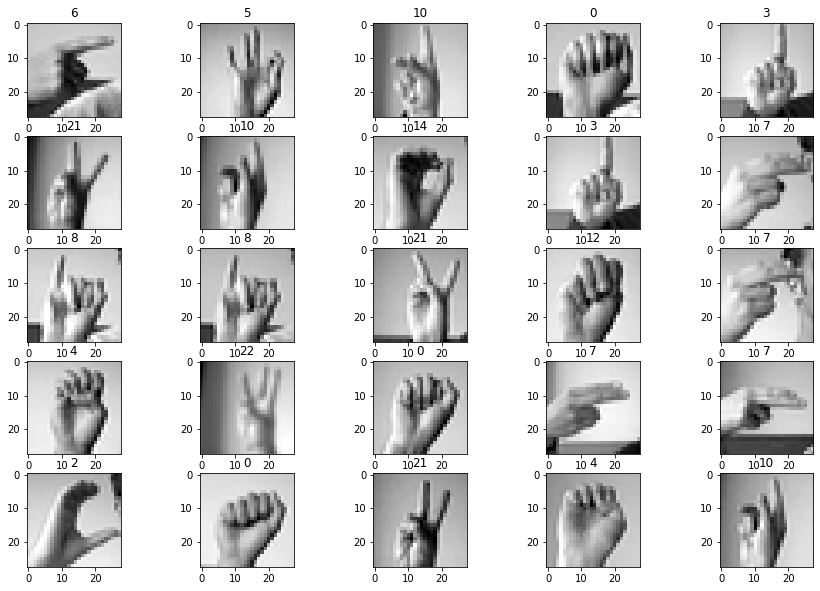

In [ ]:
#creating a 5x5 grid of the first 25 photos in the test images
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(Y_test[i])
plt.show()

In [ ]:
#creating an interactive bar graph that shows the distrubition of labels within the test set
fig = px.histogram(test_dataset, 
                   x='label', 
                   color = 'label',
                   title="Distribution of Labels in the Training Set",
                   width=700, height=500)
fig.show()

# CNN Model

## Spliting Our Training Data

In [ ]:
#spliting training images into the images we will use for training the model and validating the model
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state=7)

In [ ]:
#showing the shapes of our train, validate, and test images
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(19218, 28, 28, 1)
(19218,)
(8237, 28, 28, 1)
(8237,)
(7172, 28, 28, 1)
(7172,)


## Creating the CNN Model

In [ ]:
#creating our CNN model
model = keras.Sequential([
    
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation="relu", padding='same',
                        input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(.25),
    
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding='same'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(.25),

    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding='same'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(.25),

    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding='same'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(.25),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(.25),
    keras.layers.Dense(units=64, activation="relu"),
    keras.layers.Dense(units=26, activation="softmax"),
])


In [ ]:
#compiling the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Train our model

In [ ]:
#Training the model
history = model.fit(
    x = X_train,
    y = Y_train,
    validation_data= (X_val,Y_val),
    batch_size = 128,
    epochs=50,
    verbose=2,
)

Epoch 1/50
151/151 - 37s - loss: 3.2532 - accuracy: 0.0782 - val_loss: 3.2996 - val_accuracy: 0.0481 - 37s/epoch - 246ms/step
Epoch 2/50
151/151 - 35s - loss: 2.6087 - accuracy: 0.1940 - val_loss: 2.8778 - val_accuracy: 0.1155 - 35s/epoch - 229ms/step
Epoch 3/50
151/151 - 36s - loss: 1.7066 - accuracy: 0.4263 - val_loss: 1.2360 - val_accuracy: 0.6302 - 36s/epoch - 238ms/step
Epoch 4/50
151/151 - 34s - loss: 1.0884 - accuracy: 0.6181 - val_loss: 0.5679 - val_accuracy: 0.8424 - 34s/epoch - 226ms/step
Epoch 5/50
151/151 - 34s - loss: 0.7691 - accuracy: 0.7266 - val_loss: 0.3447 - val_accuracy: 0.9126 - 34s/epoch - 226ms/step
Epoch 6/50
151/151 - 34s - loss: 0.5836 - accuracy: 0.7917 - val_loss: 0.2344 - val_accuracy: 0.9484 - 34s/epoch - 228ms/step
Epoch 7/50
151/151 - 34s - loss: 0.4556 - accuracy: 0.8388 - val_loss: 0.1557 - val_accuracy: 0.9627 - 34s/epoch - 226ms/step
Epoch 8/50
151/151 - 34s - loss: 0.3639 - accuracy: 0.8735 - val_loss: 0.1051 - val_accuracy: 0.9819 - 34s/epoch - 225

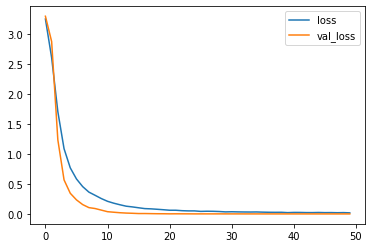

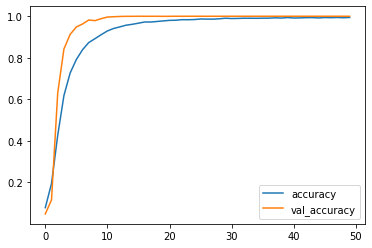

In [ ]:
#Viewing the training results
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

# Results

## Classification Report

In [ ]:
#creating our predictions using the test pixel values
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis = 1)

#creating a report that show how our predictions compare with actual values
print(classification_report(Y_test, predictions))

225/225 [==============================] - 4s 17ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      0.99      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       0.99      1.00      0.99       348
           7       1.00      1.00      1.00       436
           8       1.00      1.00      1.00       288
          10       1.00      1.00      1.00       331
          11       1.00      1.00      1.00       209
          12       1.00      1.00      1.00       394
          13       1.00      1.00      1.00       291
          14       1.00      1.00      1.00       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       0.99  